# B. Sourcing Data and Using Pandas
> Introduction to sourcing data and using pandas. 
- toc: true
- categories: []
- type: pbl
- week: 18

Before working with pandas and other libraries, you need to find or source structured data. Most data you will find published on the internet you will find in a .csv file. CSV files are a comma seperated text file, where each line of the file is a data record. Another way to work with data is through a sqlite table. This method however, also requires a CSV file in order to create a sqlite file. 

[PANDAS DOCUMENTATION](pandas.pydata.org/docs/index.html)

## How to get data from a CSV file
1.  Find csv file from an online source (make sure the data is clean and trustworthy)
> Some sources to find data in csv format include [github](https://github.com/awesomedata/awesome-public-datasets), [kaggle](https://www.kaggle.com/datasets/?fileType=csv). Or you can do a simple google search. 
2. Access by file path: Make and save the file to a folder in your directory called 'files'. Then you can access the data as shown below. 

In [5]:
import pandas as pd 
data = pd.read_csv('files/data.csv')
print(data)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.4
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


Another way to access data from a csv file is to transfer the data into a SQL table. If you are familiar with SQL, or find tables easier to work with this may be your choice but keep in mind that this requires a few more steps. Here's the code to create a table and populate it with data from a csv file. Note that you must have SQL previously installed, as well as the sqlite viewer extension on vscode ... 

*BEWARE*: Using the SQL way, limits the use of Pandas on your data set. To see data analysis using SQL including the whole cleaning and visualiztion process go [here](https://tanishapatil1234.github.io/test-fastpage-tp/2023/03/21/GDP_vs_CO2.html#CLEANING-DATA).

In [ ]:
# Required imports
import sqlite3
from sqlite3 import Error

# creating functions to make sqlite table (makes process easier if you plan to make multuple tables for different datasets)

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn
def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

def main():
    database = "instance/energy.db" # Path to an empty folder I made called instance. energy.db will be created when the code is run
    # Here I specify the column names correlating to the data in the csv file
    sql_create_projects_table = """ CREATE TABLE IF NOT EXISTS energy ( 
                                        id PRIMARY KEY,
                                        country text NOT NULL,
                                        e_type text NOT NULL,
                                        year integer NOT NULL,
                                        gdp integer NOT NULL, 
                                        CO2_emission
                                        Population
                                    ); """

    # create a database connection
    conn = create_connection(database)

    # create tables
    if conn is not None:
        # create projects table
        create_table(conn, sql_create_projects_table)
    else:
        print("Error! cannot create the database connection.")
if __name__ == '__main__':
    main()

In [ ]:
# Populate
import sqlite3 as sq
import pandas as pd

conn = sq.connect('instance/energy.db')
 
# Create a cursor object
curs = conn.cursor()
 
data = pd.read_csv('files/energy.csv')
 
# Write the data to a sqlite db table
data.to_sql('energy', conn, if_exists='replace', index=False)
   
# Run select sql query
curs.execute('SELECT * FROM ENERGY')
 
# Fetch all records
# as list of tuples
records = curs.fetchall()
     
# Close connection to SQLite database
conn.close()

## Pandas Basics
Pandas is powerful when it comes to working with data. Below are some demonstrations of the tasks that can be carried out with pandas. Its a good idea to read through the official documentation when experiencing issues. 

In [6]:
data.head() # Present data in table format

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [7]:
data.head(1) # Access first record

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1


In [8]:
data.info() #  Metadata (data about the data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [22]:
data.describe() # Returns descriptive statistics about your data

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.800000
std,42.299949,14.510259,16.450434,266.377134
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [11]:
data['Pulse'] # Access one column by name

0      110
1      117
2      103
3      109
4      117
      ... 
164    105
165    110
166    115
167    120
168    125
Name: Pulse, Length: 169, dtype: int64

In [13]:
data['Pulse'].value_counts().reset_index() #count frequency of values

,index,Pulse
0,100,19
1,90,12
2,103,9
3,109,9
4,107,8
5,108,7
6,97,7
7,110,7
8,106,6
9,111,6


## Data Cleaning
When working with large sets of data it is crucial that the set is clean. This means getting rid of bad data. 
Bad data could be: 
- empty cells
- data in the wrong format 
- wrong data 
- duplicate data

In [ ]:
          Duration  Date       Pulse  Maxpulse  Calories
  0         60  '2020/12/01'    110       130     409.1
  1         60  '2020/12/02'    117       145     479.0
  2         60  '2020/12/03'    103       135     340.0
  3         45  '2020/12/04'    109       175     282.4
  4         45  '2020/12/05'    117       148     406.0
  5         60  '2020/12/06'    102       127     300.0
  6         60  '2020/12/07'    110       136     374.0
  7        450  '2020/12/08'    104       134     253.3
  8         30  '2020/12/09'    109       133     195.1
  9         60  '2020/12/10'     98       124     269.0
  10        60  '2020/12/11'    103       147     329.3
  11        60  '2020/12/12'    100       120     250.7
  12        60  '2020/12/12'    100       120     250.7
  13        60  '2020/12/13'    106       128     345.3
  14        60  '2020/12/14'    104       132     379.3
  15        60  '2020/12/15'     98       123     275.0
  16        60  '2020/12/16'     98       120     215.2
  17        60  '2020/12/17'    100       120     300.0
  18        45  '2020/12/18'     90       112       NaN
  19        60  '2020/12/19'    103       123     323.0
  20        45  '2020/12/20'     97       125     243.0
  21        60  '2020/12/21'    108       131     364.2
  22        45           NaN    100       119     282.0
  23        60  '2020/12/23'    130       101     300.0
  24        45  '2020/12/24'    105       132     246.0
  25        60  '2020/12/25'    102       126     334.5
  26        60    2020/12/26    100       120     250.0
  27        60  '2020/12/27'     92       118     241.0
  28        60  '2020/12/28'    103       132       NaN
  29        60  '2020/12/29'    100       132     280.0
  30        60  '2020/12/30'    102       129     380.3
  31        60  '2020/12/31'     92       115     243.0


This data needs to be cleaned. 
- The data contains empty cells ("Date " in row 22 and "Calories" in row 18 and 28) 
- Wrong format ("Date" in row 26) 
- Wrong data ("Duration" in row 7)
- Duplicates (row 11 and 12)

Here is how to clean data using pandas: 

Drop all rows with empty cells

In [ ]:
new_data = data.dropna() # Syntax using pandas to drop all rows with empty cells

Drop all rows with NULL values

In [ ]:
data.dropna(inplace = True) # Syntax using pandas to drop all rows with NULL values

Replace all NULL values with a new value

In [ ]:
data.fillna(130, inplace = True) # Syntax using pandas to replace all NULL values with the number 130 (this number can be replaced)

Replace NULL values in the columns (specified by column) with a new value

In [ ]:
data["Calories"].fillna(130, inplace = True) # Syntax using pandas to replace NULL values in the "Calories" columns with the number 130 (this number can be replaced)

Convert all values in the Date column into the same date format

In [ ]:
data['Date'] = pd.to_datetime(data['Date']) # Syntax using pandas to convert all values in the Date column into the same date format

Change data specified by row(row number) and column(column name)

In [ ]:
data.loc[7, 'Duration'] = 45 # Set "Duration" = 45 in row 7

Iterate through the data and replace values specified by a condition 

In [ ]:
for i in data.index:  # Using a for loop to iterate through the data and replace values specified by the condition below
    if data.loc[i, "Duration"] > 150: 
        data.loc[i, "Duration"] = 150

Iterate through the data and delete rows specified by a condition

In [ ]:
for i in data.index:  # Using a for loop to iterate through the data and delete rows specified by the condition below
    if data.loc[i, "Duration"] > 150: 
        data.drop(i, inplace = True)

In [ ]:
print(data.duplicated()) # prints True for every row that is a duplicate

Deletes all rows with duplicate values

In [ ]:
data.drop_duplicates(inplace = True) # deletes all rows wil duplicate values

# Visualizing Data

In [16]:
data.corr() #returns correlation coefficient between two columns in data table

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922721
Pulse,-0.155408,1.000000,0.786535,0.025120
Maxpulse,0.009403,0.786535,1.000000,0.203814
Calories,0.922721,0.025120,0.203814,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

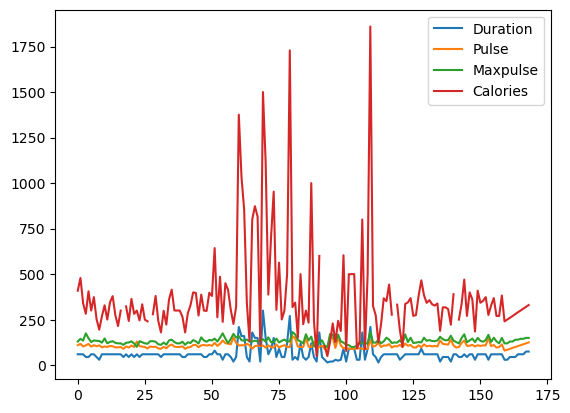

In [17]:
import matplotlib.pyplot as plt 

data.plot() #plots data
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

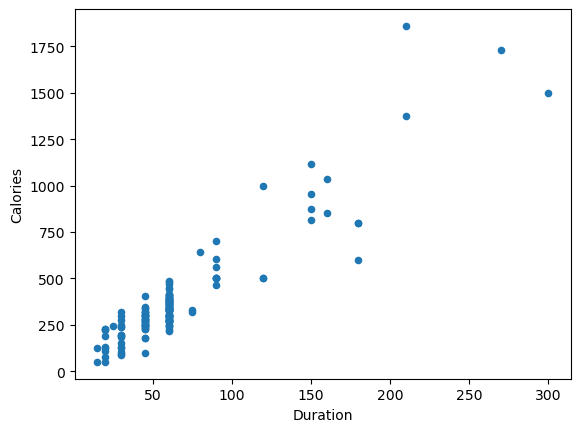

In [18]:
data.plot(kind = "scatter", x = "Duration", y = "Calories") # You can specify a different type of plot with the kind parameter. You can also specify x and y.
plt.show

*Visualiztion types:* 
- bar or barh : bar plots
- hist : histograms 
- box : boxplots
- kde or density : density plots
- area : area plots
- scatter : scatter plots 
- hexbin : hexagonal bin plots
- pie : pie plots

There are more, research to find what visualization best represents your data. 

Line of best fit example

Text(1, 17, 'y= 0.23+ 2.02')

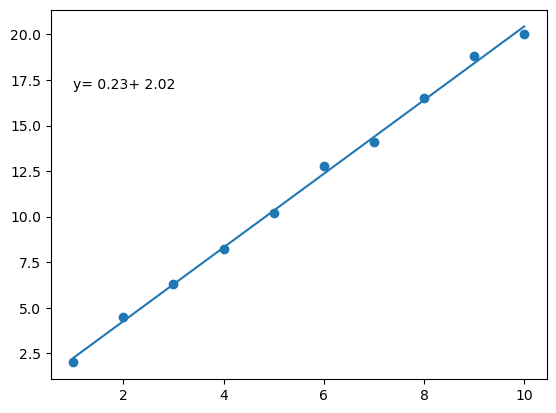

In [21]:
import numpy as np # For the sake of this example, importing numpy

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,4.5,6.3, 8.2, 10.2, 12.8, 14.1, 16.5, 18.8, 20])

a, b = np.polyfit(x, y, 1) # To plot a line of best fit, install numpy and use this syntax
plt.scatter(x, y) # Scatter plot with array a and array b data
plt.plot(x, a*x+b) # Plot line of best fit
plt.text(1, 17, 'y= ' + '{:.2f}'.format(b) + '+ {:.2f}'.format(a)) # Equation of line of best fit